In [1]:
import sys
import pandas as pd
import numpy as np
from glob import glob
import os
from types import SimpleNamespace

REPO_DIR = os.path.abspath("..")
sys.path.append(REPO_DIR)

import utils.data_utils as data_utils
import utils.PATHS as PATHS

In [2]:
LAB_FIELDS = SimpleNamespace(**data_utils.LAB_FIELDS)
DIAG_FIELDS = SimpleNamespace(**data_utils.DIAG_FIELDS)

In [4]:
'''FIELD = {
    "ID": "Patient ID",
    "RACE": "Race",
    "DOB": "Date of Birth",
    "Nationality": "Nationality",
    "INSTITUTION": "Institution Code",
    "TEST_NAME": "Lab Resulted Order Test Description",
    "RESULT": "Result Value",
    "DATE": "Specimen Received Date" # "Specimen Collection Date",
}
HOME_DIR = "/home/jovyan"
DATA_DIR = os.path.join(HOME_DIR, "arc-sg/data")
OUTPUT_DIR = os.path.join(HOME_DIR, "arc-sg/outputs")
def aggregate_csvs(input_dir, curr_df = pd.DataFrame(), usecols=None):
    files = glob(input_dir)
    df_list = []
    if usecols:
        df_list = [pd.read_csv(file,engine='python',error_bad_lines=False, usecols=usecols) for file in files]
    else: 
        df_list = [pd.read_csv(file) for file in files]
    df_all  = pd.concat([curr_df, *df_list], ignore_index=True)
    return df_all

input_dir = os.path.join(DATA_DIR, "SGH 2015-2022", "*.csv")
usecols = ['Patient ID','Gender', 'Date of Birth','Specimen Received Date', 'Lab Resulted Order Test Description','Result Value' ] # temporarily
# usecols = FIELD.values()
labs_df = pd.DataFrame()

labs_df = aggregate_csvs(os.path.join(DATA_DIR, "SGH 2015-2022", "*.csv"), labs_df, usecols)
labs_df'''

'FIELD = {\n    "ID": "Patient ID",\n    "RACE": "Race",\n    "DOB": "Date of Birth",\n    "Nationality": "Nationality",\n    "INSTITUTION": "Institution Code",\n    "TEST_NAME": "Lab Resulted Order Test Description",\n    "RESULT": "Result Value",\n    "DATE": "Specimen Received Date" # "Specimen Collection Date",\n}\nHOME_DIR = "/home/jovyan"\nDATA_DIR = os.path.join(HOME_DIR, "arc-sg/data")\nOUTPUT_DIR = os.path.join(HOME_DIR, "arc-sg/outputs")\ndef aggregate_csvs(input_dir, curr_df = pd.DataFrame(), usecols=None):\n    files = glob(input_dir)\n    df_list = []\n    if usecols:\n        df_list = [pd.read_csv(file,engine=\'python\',error_bad_lines=False, usecols=usecols) for file in files]\n    else: \n        df_list = [pd.read_csv(file) for file in files]\n    df_all  = pd.concat([curr_df, *df_list], ignore_index=True)\n    return df_all\n\ninput_dir = os.path.join(DATA_DIR, "SGH 2015-2022", "*.csv")\nusecols = [\'Patient ID\',\'Gender\', \'Date of Birth\',\'Specimen Received Date

In [3]:
labs_df = pd.read_csv(os.path.join(PATHS.OUTPUT_DIR, "labs_master.csv"))
labs_df

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
0,0,SGH,e01cba745894ac232087,Chinese,1948-10-01,Malaysian,2022-04-29,APTT,28.5
1,1,SGH,e01cba745894ac232087,Chinese,1948-10-01,Malaysian,2022-04-29,APTT,NaN
2,2,SGH,e01cba745894ac232087,Chinese,1948-10-01,Malaysian,2022-04-29,"GLUCOSE,POCT",13.2
3,3,SGH,e01cba745894ac232087,Chinese,1948-10-01,Malaysian,2022-04-29,"GLUCOSE,POCT",13.3
4,4,SGH,e01cba745894ac232087,Chinese,1948-10-01,Malaysian,2022-04-29,"GLUCOSE,POCT",14.7
...,...,...,...,...,...,...,...,...,...
23615791,23615791,SGH,0766bf16627bf6ac7d84,Chinese,1932-01-01,Singapore Citizen,2019-10-24,"PROTEIN,TOTAL",58
23615792,23615792,SGH,0766bf16627bf6ac7d84,Chinese,1932-01-01,Singapore Citizen,2019-10-24,"LACTATE,PLASMA",1.2
23615793,23615793,SGH,0766bf16627bf6ac7d84,Chinese,1932-01-01,Singapore Citizen,2019-10-24,FERRITIN,261
23615794,23615794,SGH,0766bf16627bf6ac7d84,Chinese,1932-01-01,Singapore Citizen,2019-10-24,IRON,2


In [4]:
# Load data
diag_df = pd.read_pickle(os.path.join(PATHS.OUTPUT_DIR, "diag_df.pkl"))
diag_df

,Diagnosis Code (ICD10),Diagnosis Date,Institution Code,Patient ID,Gender,Race,Nationality,Date of Birth
0,1130600,2018-05-03,CGH,f8242fbd93082a558186,MALE,Chinese,Singapore Citizen,1956-02-01
1,1171800,2018-01-13,CGH,4aa94e796c55ccd46823,FEMALE,Chinese,Singapore Citizen,1947-12-01
2,1171800,2018-01-29,CGH,f6e6d2cd9c5f063a7a0e,MALE,Chinese,Singapore Citizen,1966-04-01
3,1171800,2018-01-31,CGH,e57b551545f95a6bb04b,FEMALE,Chinese,Singapore Citizen,1931-01-01
4,1171800,2018-02-02,CGH,445b537ba35ed96e42da,MALE,Chinese,Singapore Citizen,1939-06-01
...,...,...,...,...,...,...,...,...
19410596,Z992,2018-01-09,SGH,cdbe4226729811af8a39,MALE,Chinese,Singapore Citizen,1949-09-01
19410597,Z992,2018-01-17,SGH,f5eda18b809934c779f9,MALE,Chinese,Singapore Citizen,1948-07-01
19410598,Z992,2018-02-01,SGH,2ad9f51b21f89b0b489a,MALE,Chinese,Singapore Citizen,1944-11-01
19410599,Z992,2018-03-13,SGH,f2e58a742a66ab954057,FEMALE,Chinese,Singapore Citizen,1960-04-01


In [7]:
## Filter lab df by relevant tests, convert units (reduce size of df and standardise lab df format for function below)

In [8]:
## Filter diagnosis df by relevant patients, relevant cancer diagnoses, and DM diagnoses (to reduce size of df)

In [9]:
## Create function that takes in lab_df (w test type col according to slides), diagnoses_df
# use LAB_FIELDS and DIAG_FIELDS name space so the new col names are easily mappable
# function should 
    # get 1st dm dx dt and 1st cancer dx dt per patient and put into a window df
    # merge lab df with window df and filter by window (is a vectorised operation)
    # groupby patient id and test and agg result and date list, then flatten to one row per patinet


In [5]:
LAB_FIELDS.ID

'Patient ID'

# Lab test exploration

In [6]:
glucose_mask = labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains("glucose", case=False, na=False) & labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains("fasting", case=False, na=False)

In [7]:
ldl_mask = labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains("ldl", case=False, na=False) # 

In [8]:
fasting_glucose = labs_df[glucose_mask]

In [9]:
fasting_glucose[data_utils.LAB_FIELDS["TEST_NAME"]].unique()

array(['GLUCOSE,PLASMA FASTING', 'GLUCOSE FASTING'], dtype=object)

In [10]:
ldl = labs_df[ldl_mask]

In [11]:
ldl[data_utils.LAB_FIELDS["TEST_NAME"]].unique()

array(['LDL-CHOLESTEROL,CALCULATED', 'CHOLESTEROL,TG,HDL,LDL',
       'LDL-CHOLESTEROL,DIRECT'], dtype=object)

# Lab test filtering

In [12]:
glucose_mask = labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains("glucose", case=False, na=False) & labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains("fasting", case=False, na=False)
other_tests_mask = labs_df[data_utils.LAB_FIELDS["TEST_NAME"]].str.contains('HBA1C|TRIGLYCERIDES|LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', case=False, na=False)

In [13]:
filtered_labs_df = labs_df
filtered_labs_df['Lab Resulted Order Test Description'] = labs_df['Lab Resulted Order Test Description'].str.replace('GLUCOSE,PLASMA FASTING', 'GLUCOSE FASTING', case=False, regex=True)
filtered_labs_df = filtered_labs_df[filtered_labs_df['Lab Resulted Order Test Description'].str.contains('HBA1C|TRIGLYCERIDES|LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT|GLUCOSE FASTING', case=False, na=False)]

In [14]:
##converting all LDL labels to LAD-CHOLESTEROL
filtered_labs_df['Lab Resulted Order Test Description'] = filtered_labs_df['Lab Resulted Order Test Description'].str.replace('LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', 'LDL-CHOLESTEROL', case=False,regex=True)
filtered_labs_df

/tmp/ipykernel_5094/2906201204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_labs_df['Lab Resulted Order Test Description'] = filtered_labs_df['Lab Resulted Order Test Description'].str.replace('LDL-CHOLESTEROL,CALCULATED|LDL-CHOLESTEROL,DIRECT', 'LDL-CHOLESTEROL', case=False,regex=True)


,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
260,260,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.8
261,261,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C IFCC,116
265,265,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,LDL-CHOLESTEROL,3.80
266,266,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,TRIGLYCERIDES,1.54
811,811,SGH,120e019820ccdb186e38,Malay,1961-03-01,Malaysian,2022-03-18,HBA1C,5.8
...,...,...,...,...,...,...,...,...,...
23612980,23612980,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,HBA1C,5.9
23612990,23612990,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,LDL-CHOLESTEROL,2.46
23612991,23612991,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,TRIGLYCERIDES,1.07
23615613,23615613,SGH,54f3de0ddf8cc652f05f,Chinese,1934-01-01,Singapore Citizen,2019-10-24,HBA1C,6.4


In [15]:
filtered_labs_df.to_csv(os.path.join(PATHS.OUTPUT_DIR, "filtered_labs.csv"), index=False)

In [16]:
filtered_labs_df['Lab Resulted Order Test Description'].unique

<bound method Series.unique of 260                   HBA1C
261              HBA1C IFCC
265         LDL-CHOLESTEROL
266           TRIGLYCERIDES
811                   HBA1C
                 ...       
23612980              HBA1C
23612990    LDL-CHOLESTEROL
23612991      TRIGLYCERIDES
23615613              HBA1C
23615784              HBA1C
Name: Lab Resulted Order Test Description, Length: 135904, dtype: object>

# Finalising HbA1C and Triglyceride data

In [17]:
filtered_labs_df[data_utils.LAB_FIELDS["DATE"]] = pd.to_datetime(filtered_labs_df[data_utils.LAB_FIELDS["DATE"]])

/tmp/ipykernel_5094/3209323937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_labs_df[data_utils.LAB_FIELDS["DATE"]] = pd.to_datetime(filtered_labs_df[data_utils.LAB_FIELDS["DATE"]])


In [18]:
filtered_labs_df = filtered_labs_df[~filtered_labs_df['Lab Resulted Order Test Description'].str.contains('TRIGLYCERIDES,FLUID | TRIGLYCERIDES,URINE', case=False, na=False)]

In [19]:
filtered_labs_df['Lab Resulted Order Test Description'].unique()

array(['HBA1C', 'HBA1C IFCC', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES',
       'GLUCOSE FASTING', 'HBA1c, blood (dual reporting)',
       'TRIGLYCERIDES,FLUID', 'TRIGLYCERIDES,URINE'], dtype=object)

# Convert HbA1C IFCC values into percentage values

In [20]:
filtered_labs_df['Result Value']=pd.to_numeric(filtered_labs_df['Result Value'], errors='coerce')
for index, value in filtered_labs_df['Lab Resulted Order Test Description'].items():
    if value == 'HBA1C IFCC':
        filtered_labs_df.at[index, 'Result Value'] = 0.09148* filtered_labs_df.at[index, 'Result Value']+ 2.152
        filtered_labs_df.at[index, 'Lab Resulted Order Test Description'] = 'HBA1C'
        
filtered_labs_df

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
260,260,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.80000
261,261,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.76368
265,265,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,LDL-CHOLESTEROL,3.80000
266,266,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,TRIGLYCERIDES,1.54000
811,811,SGH,120e019820ccdb186e38,Malay,1961-03-01,Malaysian,2022-03-18,HBA1C,5.80000
...,...,...,...,...,...,...,...,...,...
23612980,23612980,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,HBA1C,5.90000
23612990,23612990,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,LDL-CHOLESTEROL,2.46000
23612991,23612991,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,TRIGLYCERIDES,1.07000
23615613,23615613,SGH,54f3de0ddf8cc652f05f,Chinese,1934-01-01,Singapore Citizen,2019-10-24,HBA1C,6.40000


In [21]:
dff = filtered_labs_df[filtered_labs_df['Lab Resulted Order Test Description']=='HBA1c, blood (dual reporting)']
dff

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
35933,35933,SGH,922048da629b1e918013,Chinese,1954-10-01,Singapore Citizen,2022-04-05,"HBA1c, blood (dual reporting)",NaN
147566,147566,SGH,b0817fd8e8386eb21f44,Indian,1947-03-01,Singapore Citizen,2022-04-30,"HBA1c, blood (dual reporting)",NaN
155367,155367,SGH,d325cec36bab6009b69d,Chinese,1946-07-01,Singapore Citizen,2022-04-27,"HBA1c, blood (dual reporting)",NaN
212088,212088,SGH,b6d6419ac6ae19f5b341,Chinese,1948-07-01,Singapore Citizen,2022-04-18,"HBA1c, blood (dual reporting)",NaN
346241,346241,SGH,afdc140be004815ca986,Chinese,1955-07-01,Singapore Citizen,2022-04-29,"HBA1c, blood (dual reporting)",NaN
...,...,...,...,...,...,...,...,...,...
23300972,23300972,SGH,daf9e1a35c608a457079,Chinese,1941-06-01,Singapore Citizen,2020-03-20,"HBA1c, blood (dual reporting)",NaN
23357084,23357084,SGH,6c3d51901b8535223eff,Chinese,1971-12-01,Singapore Citizen,2020-03-24,"HBA1c, blood (dual reporting)",NaN
23407597,23407597,SGH,652e6d2fee68300fa304,Indian,1986-11-01,Singapore Citizen,2020-03-05,"HBA1c, blood (dual reporting)",NaN
23446561,23446561,SGH,0de8dff112f5065c147b,Chinese,1959-09-01,Chinese,2020-03-17,"HBA1c, blood (dual reporting)",NaN


# Drop rows with 'TRIGLYCERIDES,FLUID', 'TRIGLYCERIDES,URINE', 'HBA1c, blood (dual reporting)''

In [22]:
filtered_labs_df = filtered_labs_df[~filtered_labs_df['Lab Resulted Order Test Description'].isin (['TRIGLYCERIDES,FLUID' , 'TRIGLYCERIDES,URINE', 'HBA1c, blood (dual reporting)'])]
filtered_labs_df

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
260,260,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.80000
261,261,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.76368
265,265,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,LDL-CHOLESTEROL,3.80000
266,266,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,TRIGLYCERIDES,1.54000
811,811,SGH,120e019820ccdb186e38,Malay,1961-03-01,Malaysian,2022-03-18,HBA1C,5.80000
...,...,...,...,...,...,...,...,...,...
23612980,23612980,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,HBA1C,5.90000
23612990,23612990,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,LDL-CHOLESTEROL,2.46000
23612991,23612991,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,TRIGLYCERIDES,1.07000
23615613,23615613,SGH,54f3de0ddf8cc652f05f,Chinese,1934-01-01,Singapore Citizen,2019-10-24,HBA1C,6.40000


# Checking for Null values

In [23]:
num_rows_with_nulls = filtered_labs_df[filtered_labs_df.isnull().any(axis=1)]
num_rows_with_nulls

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
15668,15668,SGH,842ad1a949567732f5bb,Bangladeshi,1987-01-01,Bangladeshi,2022-04-15,HBA1C,NaN
15669,15669,SGH,842ad1a949567732f5bb,Bangladeshi,1987-01-01,Bangladeshi,2022-04-15,HBA1C,NaN
151098,151098,SGH,cc436ac3cb2e08e776d6,Chinese,1935-02-01,Singapore Citizen,2022-04-23,GLUCOSE FASTING,NaN
184082,184082,SGH,93d88169afc60243a845,Chinese,1949-05-01,Singapore Citizen,2022-04-05,LDL-CHOLESTEROL,NaN
189625,189625,SGH,07eeb02c2c6a37b3a807,Chinese,1948-05-01,Singapore Citizen,2022-09-09,LDL-CHOLESTEROL,NaN
...,...,...,...,...,...,...,...,...,...
22967468,22967468,SGH,b8a95823ecc4ea0cda59,Chinese,1928-01-01,Singapore Citizen,2020-03-17,GLUCOSE FASTING,NaN
23094816,23094816,SGH,ad841394866100fea791,Chinese,1943-05-01,Singapore Citizen,2020-03-16,HBA1C,NaN
23094817,23094817,SGH,ad841394866100fea791,Chinese,1943-05-01,Singapore Citizen,2020-03-16,HBA1C,NaN
23228638,23228638,SGH,99f14795b87f57a99331,Chinese,1963-10-01,Singapore Citizen,2020-03-06,GLUCOSE FASTING,NaN


In [24]:
filtered_labs_df=filtered_labs_df.dropna()

# Check and drop duplicate rows

In [25]:
duplicates=filtered_labs_df[filtered_labs_df.duplicated()]
duplicates

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value


In [26]:
filtered_labs_df=filtered_labs_df.drop_duplicates()
filtered_labs_df

,Unnamed: 0,Institution Code,Patient ID,Race,Date of Birth,Nationality,Specimen Received Date,Lab Resulted Order Test Description,Result Value
260,260,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.80000
261,261,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,HBA1C,12.76368
265,265,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,LDL-CHOLESTEROL,3.80000
266,266,SGH,5ba30677eb2e5c1c92aa,Chinese,1957-02-01,Malaysian,2022-04-09,TRIGLYCERIDES,1.54000
811,811,SGH,120e019820ccdb186e38,Malay,1961-03-01,Malaysian,2022-03-18,HBA1C,5.80000
...,...,...,...,...,...,...,...,...,...
23612980,23612980,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,HBA1C,5.90000
23612990,23612990,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,LDL-CHOLESTEROL,2.46000
23612991,23612991,SGH,3ca221647b0fa03bb51d,Chinese,1948-07-01,Singapore Citizen,2019-10-23,TRIGLYCERIDES,1.07000
23615613,23615613,SGH,54f3de0ddf8cc652f05f,Chinese,1934-01-01,Singapore Citizen,2019-10-24,HBA1C,6.40000


In [27]:
filtered_labs_df['Lab Resulted Order Test Description'].unique()

array(['HBA1C', 'LDL-CHOLESTEROL', 'TRIGLYCERIDES', 'GLUCOSE FASTING'],
      dtype=object)

In [28]:
filtered_labs_df['Lab Resulted Order Test Description'].value_counts()

HBA1C              71353
TRIGLYCERIDES      28915
LDL-CHOLESTEROL    25437
GLUCOSE FASTING     8607
Name: Lab Resulted Order Test Description, dtype: int64

In [29]:
#print(filtered_labs_df[filtered_labs_df['Patient ID'].apply(lambda x: isinstance(x,list))])
#print(filtered_labs_df[filtered_labs_df['Specimen Received Date'].apply(lambda x: isinstance(x,list))])

print(filtered_labs_df['Patient ID'].apply(type).value_counts())
print(filtered_labs_df['Specimen Received Date'].apply(type).value_counts())

<class 'str'>    134312
Name: Patient ID, dtype: int64
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    134312
Name: Specimen Received Date, dtype: int64


# Diabetus Diagnosis Date - Extraction 

In [30]:
# Based on ICD codes
'''ICD_codes = ('E08','E09','E10','E11','E13')


D_diag = diag_df[diag_df['Diagnosis Code (ICD10)'].isin(ICD_codes)]
print(D_diag.shape)
D_diag'''

Hba1c_high = filtered_labs_df[(filtered_labs_df["Lab Resulted Order Test Description"] == "HBA1C") & (filtered_labs_df["Result Value"] > 6.5)]

first_high_hba1c = (Hba1c_high.sort_values(['Patient ID']). groupby("Patient ID").first().reset_index().rename(columns={"Specimen Received Date": "Diabetic_diag_date"}))

first_high_hba1c

,Patient ID,Unnamed: 0,Institution Code,Race,Date of Birth,Nationality,Diabetic_diag_date,Lab Resulted Order Test Description,Result Value
0,000ff5e4f012d2d0ff2f,142599,SGH,Chinese,1948-11-01,Singapore Citizen,2022-04-08,HBA1C,6.60000
1,001ccbc902e482d45629,15641450,SGH,Chinese,1936-06-01,Singapore Citizen,2021-06-26,HBA1C,8.46412
2,0021a4e2bb81c197fcd6,7922359,SGH,Malay,1958-08-01,Singapore Citizen,2022-07-18,HBA1C,7.73228
3,002a69bc92feb1683417,159567,SGH,Chinese,1940-07-01,Singapore Citizen,2022-11-14,HBA1C,8.90000
4,00380bc40158c6193ae2,9599465,SGH,Filipino,1965-06-01,Filipino,2020-10-03,HBA1C,7.80000
...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,4863353,SGH,Malay,1963-09-01,Singapore Citizen,2022-03-18,HBA1C,13.60000
12879,ffe1048bff25e6a2540e,18674449,SGH,Chinese,1951-03-01,Singapore Citizen,2020-09-05,HBA1C,14.40000
12880,ffe2fd5cbb19db5d67cf,3662283,SGH,Indian,1950-11-01,Singapore Citizen,2021-11-19,HBA1C,6.54304
12881,ffe5fa0913159c4f8c7a,7040122,SGH,Chinese,1958-10-01,Singapore Citizen,2022-02-11,HBA1C,8.20000


In [31]:
first_high_hba1c = first_high_hba1c.drop(columns=['Unnamed: 0', 'Institution Code', 'Race', 'Date of Birth', 'Nationality', 'Lab Resulted Order Test Description', 'Result Value'])
first_high_hba1c

,Patient ID,Diabetic_diag_date
0,000ff5e4f012d2d0ff2f,2022-04-08
1,001ccbc902e482d45629,2021-06-26
2,0021a4e2bb81c197fcd6,2022-07-18
3,002a69bc92feb1683417,2022-11-14
4,00380bc40158c6193ae2,2020-10-03
...,...,...
12878,ffde66839ba534605c77,2022-03-18
12879,ffe1048bff25e6a2540e,2020-09-05
12880,ffe2fd5cbb19db5d67cf,2021-11-19
12881,ffe5fa0913159c4f8c7a,2022-02-11


In [ ]:
'''D_diag["Diagnosis Date"] = pd.to_datetime(D_diag["Diagnosis Date"])
first_D_D = (D_diag.sort_values("Diagnosis Date").groupby("Patient ID", as_index=False).first()[["Patient ID",'Diagnosis Code (ICD10)', 'Diagnosis Date']])
first_D_D

#change the coloumn name
first_D_D.rename(columns={'Diagnosis Date': 'Diabetus_diag_date'}, inplace=True)
first_D_D'''

In [ ]:
#cancer and Diabetus - merge
'''diseases_data = pd.merge(filtered_labs_df, first_D_D[['Patient ID','Diabetus_diag_date']], on= 'Patient ID', how='left')
#diseases_data = diseases_data.drop(columns=['date_result'])
diseases_data'''

# Cancer Data Preprocessing

In [32]:
#Extracting the cancer data
diag_f = diag_df[diag_df["Diagnosis Code (ICD10)"].str.startswith("C",na=False)]
diag_f

,Diagnosis Code (ICD10),Diagnosis Date,Institution Code,Patient ID,Gender,Race,Nationality,Date of Birth
76459,C020,2018-01-24,CGH,073c8ca048088e42549c,MALE,Chinese,Singapore Citizen,1946-03-01
76460,C020,2018-01-30,CGH,073c8ca048088e42549c,MALE,Chinese,Singapore Citizen,1946-03-01
76461,C021,2018-01-12,CGH,f3e2d09b396654f5f981,MALE,Chinese,Singapore Citizen,1967-03-01
76462,C021,2018-01-24,CGH,f3e2d09b396654f5f981,MALE,Chinese,Singapore Citizen,1967-03-01
76463,C021,2018-04-19,CGH,2dc4156710c10dabd5a8,FEMALE,Chinese,Singapore Citizen,1964-03-01
...,...,...,...,...,...,...,...,...
18906761,C967,2017-12-22,SGH,24dc22a2a71746f377e0,MALE,Indian,Malaysian,1990-11-01
18906762,C967,2018-01-12,SGH,eae67ae80d8e2bcc11e8,MALE,Chinese,Singapore Citizen,1956-10-01
18906763,C969,2017-08-24,SGH,ed13803bee168da72b56,MALE,Chinese,Singapore Citizen,1933-01-01
18906764,C969,2017-09-21,SGH,5aea20647e2840b7129b,MALE,Chinese,Singapore Citizen,1964-09-01


In [35]:
#Finding the first dat of diagnosis
diag_f["Diagnosis Date"] = pd.to_datetime(diag_f["Diagnosis Date"])
first_C_D = (diag_f.sort_values("Diagnosis Date").groupby("Patient ID", as_index=False).first()[["Patient ID", 'Diagnosis Code (ICD10)', 'Diagnosis Date', 'Gender']])
first_C_D

#change the coloumn name
first_C_D.rename(columns={'Diagnosis Date': 'Cancer_diag_date'}, inplace=True)
first_C_D

/tmp/ipykernel_5094/3343619860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diag_f["Diagnosis Date"] = pd.to_datetime(diag_f["Diagnosis Date"])


,Patient ID,Diagnosis Code (ICD10),Cancer_diag_date,Gender
0,0000cf7c67ba48cd7ca5,C56,2017-03-14,FEMALE
1,000138b35d37caefb202,C252,2020-05-03,MALE
2,0001b1b8dcef571dc800,C161,2018-02-04,MALE
3,0001ff080dabb2ad6e4e,C56,2022-09-21,FEMALE
4,00028c438ba6ee7f1cb3,C56,2022-07-01,FEMALE
...,...,...,...,...
84862,fffdc69ec9e4e8d95613,C180,2017-11-18,FEMALE
84863,fffef290f7991b1f4268,C509,2017-09-12,FEMALE
84864,ffff75db405b831b8652,C343,2019-07-23,MALE
84865,ffffe22027f30ab4e122,C259,2020-04-06,MALE


# Grouping of necessary data

In [36]:
filtered_labs_df['date_result'] = list(zip(filtered_labs_df['Specimen Received Date'], filtered_labs_df['Result Value']))

grouped_df = filtered_labs_df.groupby(['Patient ID','Date of Birth','Lab Resulted Order Test Description'])['date_result'].agg(list)

final_df = grouped_df.unstack('Lab Resulted Order Test Description').reset_index().rename_axis(None, axis=1)

In [37]:
final_df

,Patient ID,Date of Birth,GLUCOSE FASTING,HBA1C,LDL-CHOLESTEROL,TRIGLYCERIDES
0,0009747ecbb93007f1bc,1946-12-01,NaN,"[(2021-04-21 00:00:00, 5.5), (2021-04-21 00:00...",NaN,NaN
1,000b2a238717215130d6,1956-07-01,NaN,"[(2021-02-14 00:00:00, 6.1), (2021-02-14 00:00...","[(2021-02-14 00:00:00, 2.09)]","[(2021-02-14 00:00:00, 1.12)]"
2,000fda1a75afa6d63740,1946-08-01,NaN,"[(2022-02-11 00:00:00, 5.3), (2022-02-11 00:00...","[(2022-02-11 00:00:00, 1.53)]","[(2022-02-11 00:00:00, 0.86)]"
3,000ff5e4f012d2d0ff2f,1948-11-01,NaN,"[(2022-04-08 00:00:00, 6.6), (2022-04-08 00:00...","[(2022-04-08 00:00:00, 2.92)]","[(2022-04-08 00:00:00, 3.76)]"
4,00119dd77b81b1ac4765,1949-07-01,"[(2021-05-15 00:00:00, 7.6)]","[(2021-05-15 00:00:00, 5.3), (2021-05-15 00:00...","[(2021-05-15 00:00:00, 3.87)]","[(2021-05-15 00:00:00, 1.3)]"
...,...,...,...,...,...,...
35326,fff35f17fb32b9aa24f9,1937-08-01,NaN,"[(2020-09-12 00:00:00, 5.7), (2020-09-12 00:00...","[(2020-09-12 00:00:00, 2.6)]","[(2020-09-12 00:00:00, 2.69)]"
35327,fff88984450474529d99,1950-03-01,NaN,NaN,"[(2020-11-18 00:00:00, 1.58)]","[(2020-11-18 00:00:00, 1.05)]"
35328,fff8a85aae48426a3852,1934-04-01,NaN,"[(2020-07-17 00:00:00, 6.1), (2020-07-17 00:00...",NaN,NaN
35329,fffa31fabd695447c0d4,1938-11-01,NaN,"[(2022-08-08 00:00:00, 5.3), (2022-08-08 00:00...","[(2022-08-08 00:00:00, 3.35)]","[(2022-08-08 00:00:00, 0.73)]"


In [ ]:
'''def check_diabetic(result_list):
        if not isinstance (result_list,list):
            return 'Not Diabetic'
        for date,value in result_list:
            try:
                if float(value) > 6.5:
                    return ['diabetic', date]
            except:
                continue
        return 'Non-diabetic'
    
final_df[["Diabetic_status", "Diabetic_diagnosis_date"]] = final_df['HBA1C'].apply(check_diabetic).apply(pd.Series)
final_df'''

# Final lab data Format

In [38]:
def unpack_tuples(data_list, idx):
    if isinstance(data_list, list):
        return [item[idx] for item in data_list]
    return np.nan

final_df['HbA1C_test_dates'] = final_df['HBA1C'].apply(lambda x: unpack_tuples(x,0))
final_df['HbA1C_results'] = final_df['HBA1C'].apply(lambda x: unpack_tuples(x,1))

final_df['LDL_test_dates'] = final_df['LDL-CHOLESTEROL'].apply(lambda x: unpack_tuples(x,0))
final_df['LDL_results'] = final_df['LDL-CHOLESTEROL'].apply(lambda x: unpack_tuples(x,1))

final_df['TG_test_dates'] = final_df['TRIGLYCERIDES'].apply(lambda x: unpack_tuples(x,0))
final_df['TG_results'] = final_df['TRIGLYCERIDES'].apply(lambda x: unpack_tuples(x,1))

final_df['FG_test_dates'] = final_df['GLUCOSE FASTING'].apply(lambda x: unpack_tuples(x,0))
final_df['FG_results'] = final_df['GLUCOSE FASTING'].apply(lambda x: unpack_tuples(x,1))

final_df

,Patient ID,Date of Birth,GLUCOSE FASTING,HBA1C,LDL-CHOLESTEROL,TRIGLYCERIDES,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results
0,0009747ecbb93007f1bc,1946-12-01,NaN,"[(2021-04-21 00:00:00, 5.5), (2021-04-21 00:00...",NaN,NaN,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN
1,000b2a238717215130d6,1956-07-01,NaN,"[(2021-02-14 00:00:00, 6.1), (2021-02-14 00:00...","[(2021-02-14 00:00:00, 2.09)]","[(2021-02-14 00:00:00, 1.12)]","[2021-02-14 00:00:00, 2021-02-14 00:00:00]","[6.1, 6.085640000000001]",[2021-02-14 00:00:00],[2.09],[2021-02-14 00:00:00],[1.12],NaN,NaN
2,000fda1a75afa6d63740,1946-08-01,NaN,"[(2022-02-11 00:00:00, 5.3), (2022-02-11 00:00...","[(2022-02-11 00:00:00, 1.53)]","[(2022-02-11 00:00:00, 0.86)]","[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[5.3, 5.262320000000001]",[2022-02-11 00:00:00],[1.53],[2022-02-11 00:00:00],[0.86],NaN,NaN
3,000ff5e4f012d2d0ff2f,1948-11-01,NaN,"[(2022-04-08 00:00:00, 6.6), (2022-04-08 00:00...","[(2022-04-08 00:00:00, 2.92)]","[(2022-04-08 00:00:00, 3.76)]","[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,NaN
4,00119dd77b81b1ac4765,1949-07-01,"[(2021-05-15 00:00:00, 7.6)]","[(2021-05-15 00:00:00, 5.3), (2021-05-15 00:00...","[(2021-05-15 00:00:00, 3.87)]","[(2021-05-15 00:00:00, 1.3)]","[2021-05-15 00:00:00, 2021-05-15 00:00:00]","[5.3, 5.262320000000001]",[2021-05-15 00:00:00],[3.87],[2021-05-15 00:00:00],[1.3],[2021-05-15 00:00:00],[7.6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35326,fff35f17fb32b9aa24f9,1937-08-01,NaN,"[(2020-09-12 00:00:00, 5.7), (2020-09-12 00:00...","[(2020-09-12 00:00:00, 2.6)]","[(2020-09-12 00:00:00, 2.69)]","[2020-09-12 00:00:00, 2020-09-12 00:00:00]","[5.7, 5.719720000000001]",[2020-09-12 00:00:00],[2.6],[2020-09-12 00:00:00],[2.69],NaN,NaN
35327,fff88984450474529d99,1950-03-01,NaN,NaN,"[(2020-11-18 00:00:00, 1.58)]","[(2020-11-18 00:00:00, 1.05)]",NaN,NaN,[2020-11-18 00:00:00],[1.58],[2020-11-18 00:00:00],[1.05],NaN,NaN
35328,fff8a85aae48426a3852,1934-04-01,NaN,"[(2020-07-17 00:00:00, 6.1), (2020-07-17 00:00...",NaN,NaN,"[2020-07-17 00:00:00, 2020-07-17 00:00:00]","[6.1, 6.085640000000001]",NaN,NaN,NaN,NaN,NaN,NaN
35329,fffa31fabd695447c0d4,1938-11-01,NaN,"[(2022-08-08 00:00:00, 5.3), (2022-08-08 00:00...","[(2022-08-08 00:00:00, 3.35)]","[(2022-08-08 00:00:00, 0.73)]","[2022-08-08 00:00:00, 2022-08-08 00:00:00]","[5.3, 5.262320000000001]",[2022-08-08 00:00:00],[3.35],[2022-08-08 00:00:00],[0.73],NaN,NaN


In [39]:
final_df = final_df.drop(columns=['GLUCOSE FASTING','HBA1C','LDL-CHOLESTEROL','TRIGLYCERIDES'])
final_df

,Patient ID,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results
0,0009747ecbb93007f1bc,1946-12-01,"[2021-04-21 00:00:00, 2021-04-21 00:00:00]","[5.5, 5.53676]",NaN,NaN,NaN,NaN,NaN,NaN
1,000b2a238717215130d6,1956-07-01,"[2021-02-14 00:00:00, 2021-02-14 00:00:00]","[6.1, 6.085640000000001]",[2021-02-14 00:00:00],[2.09],[2021-02-14 00:00:00],[1.12],NaN,NaN
2,000fda1a75afa6d63740,1946-08-01,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[5.3, 5.262320000000001]",[2022-02-11 00:00:00],[1.53],[2022-02-11 00:00:00],[0.86],NaN,NaN
3,000ff5e4f012d2d0ff2f,1948-11-01,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,NaN
4,00119dd77b81b1ac4765,1949-07-01,"[2021-05-15 00:00:00, 2021-05-15 00:00:00]","[5.3, 5.262320000000001]",[2021-05-15 00:00:00],[3.87],[2021-05-15 00:00:00],[1.3],[2021-05-15 00:00:00],[7.6]
...,...,...,...,...,...,...,...,...,...,...
35326,fff35f17fb32b9aa24f9,1937-08-01,"[2020-09-12 00:00:00, 2020-09-12 00:00:00]","[5.7, 5.719720000000001]",[2020-09-12 00:00:00],[2.6],[2020-09-12 00:00:00],[2.69],NaN,NaN
35327,fff88984450474529d99,1950-03-01,NaN,NaN,[2020-11-18 00:00:00],[1.58],[2020-11-18 00:00:00],[1.05],NaN,NaN
35328,fff8a85aae48426a3852,1934-04-01,"[2020-07-17 00:00:00, 2020-07-17 00:00:00]","[6.1, 6.085640000000001]",NaN,NaN,NaN,NaN,NaN,NaN
35329,fffa31fabd695447c0d4,1938-11-01,"[2022-08-08 00:00:00, 2022-08-08 00:00:00]","[5.3, 5.262320000000001]",[2022-08-08 00:00:00],[3.35],[2022-08-08 00:00:00],[0.73],NaN,NaN


# Merge - with Diabetus Diagnosis dates and Cancer info

In [40]:
cols = final_df.columns

In [42]:

final_df = pd.merge(first_high_hba1c, final_df[cols], on= 'Patient ID', how='left')
final_df = pd.merge(final_df, first_C_D[['Patient ID','Diagnosis Code (ICD10)','Cancer_diag_date']], on= 'Patient ID', how='left')
final_df

,Patient ID,Diabetic_diag_date,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results,Diagnosis Code (ICD10),Cancer_diag_date
0,000ff5e4f012d2d0ff2f,2022-04-08,1948-11-01,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,NaN,NaN,NaT
1,001ccbc902e482d45629,2021-06-26,1936-06-01,"[2021-06-26 00:00:00, 2021-06-26 00:00:00]","[8.5, 8.464120000000001]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0021a4e2bb81c197fcd6,2022-07-18,1958-08-01,"[2022-07-18 00:00:00, 2022-07-18 00:00:00]","[7.7, 7.73228]",NaN,NaN,NaN,NaN,NaN,NaN,C541,2022-06-08
3,002a69bc92feb1683417,2022-11-14,1940-07-01,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 8.9, 8.921520000000001, 6.9, 6....","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[2.36, 1.49, 1.44, 1.76]","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[1.99, 1.16, 0.91, 1.14]",NaN,NaN,NaN,NaT
4,00380bc40158c6193ae2,2020-10-03,1965-06-01,"[2020-10-03 00:00:00, 2020-10-03 00:00:00]","[7.8, 7.823760000000001]",[2020-10-05 00:00:00],[2.48],[2020-10-05 00:00:00],[1.19],NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,2022-03-18,1963-09-01,"[2022-03-18 00:00:00, 2022-03-18 00:00:00]","[13.6, 13.587]",NaN,NaN,NaN,NaN,NaN,NaN,C61,2017-10-12
12879,ffe1048bff25e6a2540e,2020-09-05,1951-03-01,"[2020-09-05 00:00:00, 2020-09-05 00:00:00, 202...","[14.4, 14.410320000000002, 6.3, 6.2686]",[2020-09-07 00:00:00],[1.75],[2020-09-07 00:00:00],[0.87],NaN,NaN,NaN,NaT
12880,ffe2fd5cbb19db5d67cf,2021-11-19,1950-11-01,"[2021-11-19 00:00:00, 2021-11-19 00:00:00]","[6.5, 6.54304]",[2021-11-19 00:00:00],[1.44],[2021-11-19 00:00:00],[0.65],[2021-11-19 00:00:00],[9.7],NaN,NaT
12881,ffe5fa0913159c4f8c7a,2022-02-11,1958-10-01,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[8.2, 8.18968]",[2022-02-11 00:00:00],[1.93],[2022-02-11 00:00:00],[1.44],NaN,NaN,NaN,NaT


In [68]:
final_df['Patient ID'].nunique()

12883

In [56]:
final_df

,Patient ID,Diabetic_diag_date,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,...,Diagnosis Code (ICD10),Cancer_diag_date,HbA1C_filtered_dates,HbA1C_filtered_values,FG_filtered_dates,FG_filtered_values,LDL_filtered_dates,LDL_filtered_values,TG_filtered_dates,TG_filtered_values
0,000ff5e4f012d2d0ff2f,2022-04-08,1948-11-01,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
1,001ccbc902e482d45629,2021-06-26,1936-06-01,"[2021-06-26 00:00:00, 2021-06-26 00:00:00]","[8.5, 8.464120000000001]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
2,0021a4e2bb81c197fcd6,2022-07-18,1958-08-01,"[2022-07-18 00:00:00, 2022-07-18 00:00:00]","[7.7, 7.73228]",NaN,NaN,NaN,NaN,NaN,...,C541,2022-06-08,[],[],[],[],[],[],[],[]
3,002a69bc92feb1683417,2022-11-14,1940-07-01,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 8.9, 8.921520000000001, 6.9, 6....","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[2.36, 1.49, 1.44, 1.76]","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[1.99, 1.16, 0.91, 1.14]",NaN,...,NaN,NaT,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 6.9, 6.90896, 7.0, 7.00044, 6.3...",[],[],"[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.49, 1.44, 1.76]","[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.16, 0.91, 1.14]"
4,00380bc40158c6193ae2,2020-10-03,1965-06-01,"[2020-10-03 00:00:00, 2020-10-03 00:00:00]","[7.8, 7.823760000000001]",[2020-10-05 00:00:00],[2.48],[2020-10-05 00:00:00],[1.19],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,2022-03-18,1963-09-01,"[2022-03-18 00:00:00, 2022-03-18 00:00:00]","[13.6, 13.587]",NaN,NaN,NaN,NaN,NaN,...,C61,2017-10-12,[],[],[],[],[],[],[],[]
12879,ffe1048bff25e6a2540e,2020-09-05,1951-03-01,"[2020-09-05 00:00:00, 2020-09-05 00:00:00, 202...","[14.4, 14.410320000000002, 6.3, 6.2686]",[2020-09-07 00:00:00],[1.75],[2020-09-07 00:00:00],[0.87],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
12880,ffe2fd5cbb19db5d67cf,2021-11-19,1950-11-01,"[2021-11-19 00:00:00, 2021-11-19 00:00:00]","[6.5, 6.54304]",[2021-11-19 00:00:00],[1.44],[2021-11-19 00:00:00],[0.65],[2021-11-19 00:00:00],...,NaN,NaT,[],[],[],[],[],[],[],[]
12881,ffe5fa0913159c4f8c7a,2022-02-11,1958-10-01,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[8.2, 8.18968]",[2022-02-11 00:00:00],[1.93],[2022-02-11 00:00:00],[1.44],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]


 # Removing datas that are not necessary

In [ ]:

def filter_before_diagnosis(test_dates, test_values, diabetus_diagnosis_date, cancer_date):
    if not isinstance(test_dates,list) or not isinstance(test_values,list):
        return [],[]
    cancer_date = pd.to_datetime(cancer_date, errors = 'coerce')
    diabetus_diagnosis_date = pd.to_datetime(diabetus_diagnosis_date, errors = 'coerce')
    test_dates = pd.to_datetime(test_dates, errors = 'coerce')
    
    filtered_dates = []
    filtered_values = []
    
    if pd.isna(diabetus_diagnosis_date) and pd.isna(cancer_date):
        return [],[]
        
    
    
    for d,v in zip(test_dates, test_values):
        try:
            test_date = pd.to_datetime(d)
            
            if(pd.notna(diabetus_diagnosis_date) and test_date >= diabetus_diagnosis_date):          
                continue
            if (pd.notna(cancer_date) and test_date <= (cancer_date - timedelta(days=365))):
                continue
            filtered_dates.append(d)
            filtered_values.append(v)
            print(d,v)
        except:
            continue
    
    return filtered_dates, filtered_values


tests_cols = ['HbA1C', 'FG', 'LDL', 'TG']

for col in tests_cols:
    date_col = f"{col}_test_dates"
    value_col = f"{col}_results"
    filtered_data_col = f"{col}_filtered_dates"
    filtered_values_col = f"{col}_filtered_values"
    
    final_df[[filtered_data_col, filtered_values_col]] = final_df.apply(
        lambda row: pd.Series(
            filter_before_diagnosis(row[date_col],row[value_col], row ['Diabetic_diag_date'], row['Cancer_diag_date'])), axis=1)


In [57]:
final_df

,Patient ID,Diabetic_diag_date,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,...,Diagnosis Code (ICD10),Cancer_diag_date,HbA1C_filtered_dates,HbA1C_filtered_values,FG_filtered_dates,FG_filtered_values,LDL_filtered_dates,LDL_filtered_values,TG_filtered_dates,TG_filtered_values
0,000ff5e4f012d2d0ff2f,2022-04-08,1948-11-01,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
1,001ccbc902e482d45629,2021-06-26,1936-06-01,"[2021-06-26 00:00:00, 2021-06-26 00:00:00]","[8.5, 8.464120000000001]",NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
2,0021a4e2bb81c197fcd6,2022-07-18,1958-08-01,"[2022-07-18 00:00:00, 2022-07-18 00:00:00]","[7.7, 7.73228]",NaN,NaN,NaN,NaN,NaN,...,C541,2022-06-08,[],[],[],[],[],[],[],[]
3,002a69bc92feb1683417,2022-11-14,1940-07-01,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 8.9, 8.921520000000001, 6.9, 6....","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[2.36, 1.49, 1.44, 1.76]","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[1.99, 1.16, 0.91, 1.14]",NaN,...,NaN,NaT,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 6.9, 6.90896, 7.0, 7.00044, 6.3...",[],[],"[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.49, 1.44, 1.76]","[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.16, 0.91, 1.14]"
4,00380bc40158c6193ae2,2020-10-03,1965-06-01,"[2020-10-03 00:00:00, 2020-10-03 00:00:00]","[7.8, 7.823760000000001]",[2020-10-05 00:00:00],[2.48],[2020-10-05 00:00:00],[1.19],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,2022-03-18,1963-09-01,"[2022-03-18 00:00:00, 2022-03-18 00:00:00]","[13.6, 13.587]",NaN,NaN,NaN,NaN,NaN,...,C61,2017-10-12,[],[],[],[],[],[],[],[]
12879,ffe1048bff25e6a2540e,2020-09-05,1951-03-01,"[2020-09-05 00:00:00, 2020-09-05 00:00:00, 202...","[14.4, 14.410320000000002, 6.3, 6.2686]",[2020-09-07 00:00:00],[1.75],[2020-09-07 00:00:00],[0.87],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]
12880,ffe2fd5cbb19db5d67cf,2021-11-19,1950-11-01,"[2021-11-19 00:00:00, 2021-11-19 00:00:00]","[6.5, 6.54304]",[2021-11-19 00:00:00],[1.44],[2021-11-19 00:00:00],[0.65],[2021-11-19 00:00:00],...,NaN,NaT,[],[],[],[],[],[],[],[]
12881,ffe5fa0913159c4f8c7a,2022-02-11,1958-10-01,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[8.2, 8.18968]",[2022-02-11 00:00:00],[1.93],[2022-02-11 00:00:00],[1.44],NaN,...,NaN,NaT,[],[],[],[],[],[],[],[]


# Calculating Age from Date of Birth

In [94]:
final_df['Date of Birth'] =pd.to_datetime(final_df['Date of Birth'])
today=pd.Timestamp.today()
final_df['Age'] = (today - final_df['Date of Birth']).dt.days/365.25
final_df.drop(columns=['Date of Birth'])

,Patient ID,Diabetic_diag_date,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,FG_results,...,LDL_filtered_dates,LDL_filtered_values,TG_filtered_dates,TG_filtered_values,Num_HBA1C_results,Num_Fasting_glucode_results,Num_LDL_results,Num_TG_results,Date of Birth\t,Age
0,000ff5e4f012d2d0ff2f,2022-04-08,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,NaN,...,[],[],[],[],2,0,1,1,1948-11-01,76.774812
1,001ccbc902e482d45629,2021-06-26,"[2021-06-26 00:00:00, 2021-06-26 00:00:00]","[8.5, 8.464120000000001]",NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1936-06-01,89.193703
2,0021a4e2bb81c197fcd6,2022-07-18,"[2022-07-18 00:00:00, 2022-07-18 00:00:00]","[7.7, 7.73228]",NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1958-08-01,67.028063
3,002a69bc92feb1683417,2022-11-14,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 8.9, 8.921520000000001, 6.9, 6....","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[2.36, 1.49, 1.44, 1.76]","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[1.99, 1.16, 0.91, 1.14]",NaN,NaN,...,"[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.49, 1.44, 1.76]","[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.16, 0.91, 1.14]",10,0,4,4,1940-07-01,85.111567
4,00380bc40158c6193ae2,2020-10-03,"[2020-10-03 00:00:00, 2020-10-03 00:00:00]","[7.8, 7.823760000000001]",[2020-10-05 00:00:00],[2.48],[2020-10-05 00:00:00],[1.19],NaN,NaN,...,[],[],[],[],2,0,1,1,1965-06-01,60.194387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,2022-03-18,"[2022-03-18 00:00:00, 2022-03-18 00:00:00]","[13.6, 13.587]",NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1963-09-01,61.943874
12879,ffe1048bff25e6a2540e,2020-09-05,"[2020-09-05 00:00:00, 2020-09-05 00:00:00, 202...","[14.4, 14.410320000000002, 6.3, 6.2686]",[2020-09-07 00:00:00],[1.75],[2020-09-07 00:00:00],[0.87],NaN,NaN,...,[],[],[],[],4,0,1,1,1951-03-01,74.447639
12880,ffe2fd5cbb19db5d67cf,2021-11-19,"[2021-11-19 00:00:00, 2021-11-19 00:00:00]","[6.5, 6.54304]",[2021-11-19 00:00:00],[1.44],[2021-11-19 00:00:00],[0.65],[2021-11-19 00:00:00],[9.7],...,[],[],[],[],2,1,1,1,1950-11-01,74.776181
12881,ffe5fa0913159c4f8c7a,2022-02-11,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[8.2, 8.18968]",[2022-02-11 00:00:00],[1.93],[2022-02-11 00:00:00],[1.44],NaN,NaN,...,[],[],[],[],2,0,1,1,1958-10-01,66.861054


In [95]:
data_combined =final_df

# save as a pickle file as 'combined_data'|

In [96]:
data_path = os.path.join(PATHS.OUTPUT_DIR, "combined_data.pkl")
data_combined.to_pickle(data_path)

In [97]:
#sdf['HbA1C_test_dates'] = pd.to_datetime(sdf['HbA1C_test_dates']).dt.date

In [98]:
'''def filter_before_diagnosis(test_dates,test_values, diabetus_diagnosis_date, cancer_date):
    if not isinstance(test_dates, list) or pd.isna(diabetus_diagnosis_date) or pd.isna(cancer_date):
        return [],[]
    cancer_date = pd.to_datetime(cancer_date, errors = 'coerce')
    diabetus_diagnosis_date = pd.to_datetime(diabetus_diagnosis_date, errors = 'coerce')
    
    diabetus_diagnosis_date=pd.to_datetime(diabetus_diagnosis_date).date()
    cancer_date=pd.to_datetime(cancer_date).date()
    filtered_dates = []
    filtered_values = []
    
    for d,v in zip(test_dates, test_values):
        try:
            test_date = pd.to_datetime(d).date()
            
            if(pd.notna(diabetus_diagnosis_date) and test_date >= diabetus_diagnosis_date):          
                continue
            if (pd.notna(cancer_date) and test_date <= (cancer_date - timedelta(days=365))):
                continue
            filtered_dates.append(d)
            filtered_values.append(v)
            print(d,v)
        except:
            continue
    
    return filtered_dates, filtered_values



tests_cols = ['HbA1C', 'FG', 'LDL', 'TG']

for col in tests_cols:
    date_col = f"{col}_test_dates"
    value_col = f"{col}_results"
    filtered_data_col = f"{col}_filtered_dates"
    filtered_values_col = f"{col}_filtered_values"
    
    sdf[[filtered_data_col, filtered_values_col]] = sdf.apply(
        lambda row: pd.Series(
            filter_before_diagnosis(row[date_col],row[value_col], row ['Diabetic_diagnosis_date'], row['Cancer_diag_date'])), axis=1)

sdf'''

'def filter_before_diagnosis(test_dates,test_values, diabetus_diagnosis_date, cancer_date):\n    if not isinstance(test_dates, list) or pd.isna(diabetus_diagnosis_date) or pd.isna(cancer_date):\n        return [],[]\n    cancer_date = pd.to_datetime(cancer_date, errors = \'coerce\')\n    diabetus_diagnosis_date = pd.to_datetime(diabetus_diagnosis_date, errors = \'coerce\')\n    \n    diabetus_diagnosis_date=pd.to_datetime(diabetus_diagnosis_date).date()\n    cancer_date=pd.to_datetime(cancer_date).date()\n    filtered_dates = []\n    filtered_values = []\n    \n    for d,v in zip(test_dates, test_values):\n        try:\n            test_date = pd.to_datetime(d).date()\n            \n            if(pd.notna(diabetus_diagnosis_date) and test_date >= diabetus_diagnosis_date):          \n                continue\n            if (pd.notna(cancer_date) and test_date <= (cancer_date - timedelta(days=365))):\n                continue\n            filtered_dates.append(d)\n            filtered_

# Calculate number of available test results

# count of available test results in the window period

In [99]:
tests_results_available = {'HbA1C_results' : 'Num_HBA1C_results', 'FG_results' : 'Num_Fasting_glucode_results', 'LDL_results' : 'Num_LDL_results', 'TG_results' : 'Num_TG_results'}

for test_col, count_col in tests_results_available.items():
    data_combined[count_col] = data_combined[test_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
    
data_combined

,Patient ID,Diabetic_diag_date,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,...,LDL_filtered_dates,LDL_filtered_values,TG_filtered_dates,TG_filtered_values,Num_HBA1C_results,Num_Fasting_glucode_results,Num_LDL_results,Num_TG_results,Date of Birth\t,Age
0,000ff5e4f012d2d0ff2f,2022-04-08,1948-11-01,"[2022-04-08 00:00:00, 2022-04-08 00:00:00]","[6.6, 6.63452]",[2022-04-08 00:00:00],[2.92],[2022-04-08 00:00:00],[3.76],NaN,...,[],[],[],[],2,0,1,1,1948-11-01,76.774812
1,001ccbc902e482d45629,2021-06-26,1936-06-01,"[2021-06-26 00:00:00, 2021-06-26 00:00:00]","[8.5, 8.464120000000001]",NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1936-06-01,89.193703
2,0021a4e2bb81c197fcd6,2022-07-18,1958-08-01,"[2022-07-18 00:00:00, 2022-07-18 00:00:00]","[7.7, 7.73228]",NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1958-08-01,67.028063
3,002a69bc92feb1683417,2022-11-14,1940-07-01,"[2022-04-07 00:00:00, 2022-04-07 00:00:00, 202...","[8.3, 8.28116, 8.9, 8.921520000000001, 6.9, 6....","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[2.36, 1.49, 1.44, 1.76]","[2022-11-14 00:00:00, 2021-04-24 00:00:00, 202...","[1.99, 1.16, 0.91, 1.14]",NaN,...,"[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.49, 1.44, 1.76]","[2021-04-24 00:00:00, 2021-09-10 00:00:00, 202...","[1.16, 0.91, 1.14]",10,0,4,4,1940-07-01,85.111567
4,00380bc40158c6193ae2,2020-10-03,1965-06-01,"[2020-10-03 00:00:00, 2020-10-03 00:00:00]","[7.8, 7.823760000000001]",[2020-10-05 00:00:00],[2.48],[2020-10-05 00:00:00],[1.19],NaN,...,[],[],[],[],2,0,1,1,1965-06-01,60.194387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,ffde66839ba534605c77,2022-03-18,1963-09-01,"[2022-03-18 00:00:00, 2022-03-18 00:00:00]","[13.6, 13.587]",NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],2,0,0,0,1963-09-01,61.943874
12879,ffe1048bff25e6a2540e,2020-09-05,1951-03-01,"[2020-09-05 00:00:00, 2020-09-05 00:00:00, 202...","[14.4, 14.410320000000002, 6.3, 6.2686]",[2020-09-07 00:00:00],[1.75],[2020-09-07 00:00:00],[0.87],NaN,...,[],[],[],[],4,0,1,1,1951-03-01,74.447639
12880,ffe2fd5cbb19db5d67cf,2021-11-19,1950-11-01,"[2021-11-19 00:00:00, 2021-11-19 00:00:00]","[6.5, 6.54304]",[2021-11-19 00:00:00],[1.44],[2021-11-19 00:00:00],[0.65],[2021-11-19 00:00:00],...,[],[],[],[],2,1,1,1,1950-11-01,74.776181
12881,ffe5fa0913159c4f8c7a,2022-02-11,1958-10-01,"[2022-02-11 00:00:00, 2022-02-11 00:00:00]","[8.2, 8.18968]",[2022-02-11 00:00:00],[1.93],[2022-02-11 00:00:00],[1.44],NaN,...,[],[],[],[],2,0,1,1,1958-10-01,66.861054


In [100]:
test=['Num_HBA1C_results','Num_Fasting_glucode_results','Num_LDL_results','Num_TG_results']
for tests in test:
    print(data_combined[tests].value_counts())

2     8878
4     2015
1      763
6      536
3      262
8      175
5       93
7       49
10      48
9       20
12      18
14       9
11       6
13       3
17       2
15       2
18       1
19       1
16       1
20       1
Name: Num_HBA1C_results, dtype: int64
0    11382
1     1401
2       97
3        3
Name: Num_Fasting_glucode_results, dtype: int64
0     6495
1     5188
2      945
3      182
4       49
5        9
6        5
7        3
8        2
9        2
10       1
31       1
29       1
Name: Num_LDL_results, dtype: int64
0     6303
1     5247
2      983
3      217
4       70
5       32
10       7
6        7
7        5
8        3
12       2
11       1
14       1
53       1
38       1
16       1
22       1
9        1
Name: Num_TG_results, dtype: int64


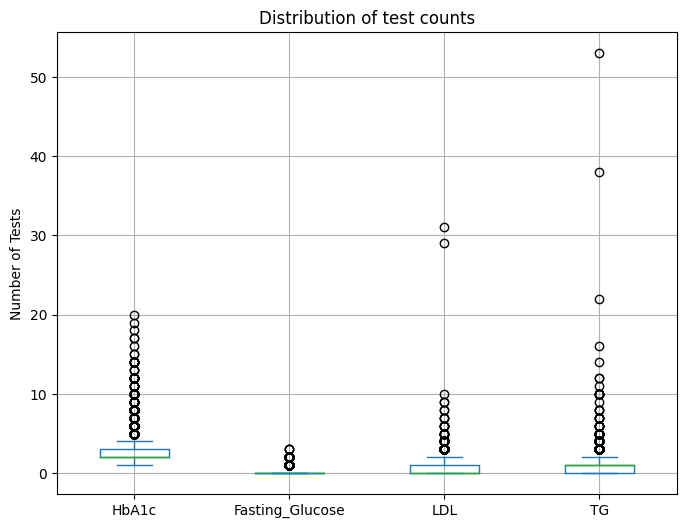

In [101]:
import matplotlib.pyplot as plt

count_cols = ['Num_HBA1C_results', 'Num_Fasting_glucode_results', 'Num_LDL_results', 'Num_TG_results']
labels = ['HbA1c', 'Fasting_Glucose', 'LDL', 'TG']

'''data_combined[count_cols].plot(kind = 'bar' , figsize=(12,6), width=0.8)

plt.title('Number of Tests per Patient')
plt.xlabel('patient Index')
plt.ylabel('Number of tests')

plt.xticks(rotation=0)
plt.legend(labels=labels)
plt.tight_layout()

plt.show()'''

data_combined [count_cols].plot(kind='box', figsize=(8,6))
plt.title('Distribution of test counts')
plt.ylabel('Number of Tests')
plt.xticks([1,2,3,4], labels)
plt.grid(True)
plt.show()

# Filtering data with atleast 1 value for each lab tests in the window period 

In [102]:
def has_high_num(num): 
    return (
        len(num['HbA1C_filtered_values']) >=1 and
        len(num['FG_filtered_values']) >= 1 and
        len(num['LDL_filtered_values']) >= 1 and
        len(num['TG_filtered_values']) >=1)
high_num_row=pd.DataFrame()
count_cols = ['Num_HBA1C_results'
              , 'Num_Fasting_glucode_results', 'Num_LDL_results', 'Num_TG_results']
labels = ['HBA1C_results', 'GLUCOSE FASTING_results', 'LDL-CHOLESTEROL_results', 'TRIGLYCERIDES_results']

'''for i in range (0,len(count_cols),1):
    high_num_rows = data_combined[data_combined[count_cols[i]].apply(has_high_num)]
    print(high_num_rows[[count_cols[i], labels[i]] ])'''
high_num_rows = data_combined[data_combined.apply(has_high_num, axis=1)]

high_num_rows

,Patient ID,Diabetic_diag_date,Date of Birth,HbA1C_test_dates,HbA1C_results,LDL_test_dates,LDL_results,TG_test_dates,TG_results,FG_test_dates,...,LDL_filtered_dates,LDL_filtered_values,TG_filtered_dates,TG_filtered_values,Num_HBA1C_results,Num_Fasting_glucode_results,Num_LDL_results,Num_TG_results,Date of Birth\t,Age
191,041f89dd9ec577172d64,2022-03-23,1949-01-01,"[2022-03-23 00:00:00, 2022-03-23 00:00:00, 202...","[9.6, 9.56188, 8.2, 8.18968, 6.3, 6.2686]","[2022-03-23 00:00:00, 2020-03-03 00:00:00]","[1.11, 0.77]","[2022-03-23 00:00:00, 2020-03-03 00:00:00]","[1.69, 1.34]",[2020-03-03 00:00:00],...,[2020-03-03 00:00:00],[0.77],[2020-03-03 00:00:00],[1.34],6,1,2,2,1949-01-01,76.607803
244,050616e34089ce955f62,2020-04-28,1952-03-01,"[2020-04-03 00:00:00, 2020-04-03 00:00:00, 202...","[12.1, 12.12332, 10.4, 10.385200000000001]",[2020-04-03 00:00:00],[3.1],[2020-04-03 00:00:00],[1.37],[2020-04-03 00:00:00],...,[2020-04-03 00:00:00],[3.1],[2020-04-03 00:00:00],[1.37],4,1,1,1,1952-03-01,73.445585
518,0a5cb7977401238f08fc,2021-03-13,1948-05-01,"[2022-02-07 00:00:00, 2022-02-07 00:00:00, 202...","[6.8, 6.817480000000001, 6.8, 6.81748000000000...","[2022-05-14 00:00:00, 2020-06-30 00:00:00]","[1.07, 4.22]","[2022-05-14 00:00:00, 2020-06-30 00:00:00]","[1.46, 1.14]",[2020-06-30 00:00:00],...,[2020-06-30 00:00:00],[4.22],[2020-06-30 00:00:00],[1.14],8,1,2,2,1948-05-01,77.278576
561,0b62de73fb53552b134c,2021-06-23,1929-01-01,"[2021-06-23 00:00:00, 2021-06-23 00:00:00, 202...","[6.8, 6.817480000000001, 6.4, 6.360080000000001]","[2021-06-24 00:00:00, 2020-08-18 00:00:00]","[3.08, 3.11]","[2021-06-24 00:00:00, 2020-08-18 00:00:00]","[0.83, 0.79]","[2021-06-24 00:00:00, 2020-08-18 00:00:00]",...,[2020-08-18 00:00:00],[3.11],[2020-08-18 00:00:00],[0.79],4,2,2,2,1929-01-01,96.607803
1325,1aad89db54a96cc5f4d1,2023-01-11,1970-04-01,"[2021-11-03 00:00:00, 2021-11-03 00:00:00, 202...","[6.1, 6.085640000000001, 7.8, 7.82376000000000...","[2022-12-24 00:00:00, 2023-04-18 00:00:00, 202...","[2.21, 1.63, 0.85, 1.54, 1.07, 1.8]","[2022-12-24 00:00:00, 2023-04-18 00:00:00, 202...","[0.78, 0.83, 0.89, 0.84, 1.21, 1.58]","[2022-09-28 00:00:00, 2021-09-28 00:00:00]",...,"[2022-12-24 00:00:00, 2022-09-28 00:00:00, 202...","[2.21, 0.85, 1.07, 1.8]","[2022-12-24 00:00:00, 2022-09-28 00:00:00, 202...","[0.78, 0.89, 1.21, 1.58]",18,2,6,6,1970-04-01,55.362081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12280,f39fdad1a070d5151a74,2020-09-29,1954-11-01,"[2020-09-29 00:00:00, 2020-09-29 00:00:00, 202...","[9.0, 9.013000000000002, 8.6, 8.555600000000002]","[2020-09-29 00:00:00, 2020-08-11 00:00:00]","[0.69, 2.54]","[2020-09-29 00:00:00, 2020-08-11 00:00:00]","[1.88, 2.1]","[2020-09-29 00:00:00, 2020-08-11 00:00:00]",...,[2020-08-11 00:00:00],[2.54],[2020-08-11 00:00:00],[2.1],4,2,2,2,1954-11-01,70.776181
12336,f4c1f5b77bd842690064,2021-03-25,1960-03-01,"[2021-03-25 00:00:00, 2021-03-25 00:00:00, 201...","[6.6, 6.63452, 6.3]","[2021-03-25 00:00:00, 2019-09-07 00:00:00]","[3.1, 3.57]","[2021-03-25 00:00:00, 2019-09-07 00:00:00]","[1.82, 1.64]","[2021-03-25 00:00:00, 2019-09-07 00:00:00]",...,[2019-09-07 00:00:00],[3.57],[2019-09-07 00:00:00],[1.64],3,2,2,2,1960-03-01,65.445585
12440,f686cc8cabcbe44c1f5c,2020-12-11,1938-10-01,"[2020-12-11 00:00:00, 2020-12-11 00:00:00, 202...","[7.1, 7.091920000000001, 7.7, 7.73228]","[2020-12-11 00:00:00, 2020-06-27 00:00:00]","[0.77, 1.07]","[2020-12-11 00:00:00, 2020-06-27 00:00:00]","[0.83, 0.89]",[2020-06-27 00:00:00],...,[2020-06-27 00:00:00],[1.07],[2020-06-27 00:00:00],[0.89],4,1,2,2,1938-10-01,86.861054
12696,fc3df492950fe5489133,2021-07-02,1972-04-01,"[2020-09-15 00:00:00, 2020-09-15 00:00:00, 202...","[15.0, 14.959200000000003, 15.0, 14.9592000000...",[2020-10-20 00:00:00],[2.91],[2020-10-20 00:00:00],[1.47],[2020-10-20 00:00:00],...,[2020-10-20 00:00:00],[2.91],[2020-10-20 00:00:00],[1.47],6,1,1,1,1972-04-01,53.360712


In [103]:
data_path = os.path.join(PATHS.OUTPUT_DIR, "final_usable_data.pkl")
high_num_rows.to_pickle(data_path)

In [104]:
print(high_num_rows['Diagnosis Code (ICD10)'].value_counts())


Series([], Name: Diagnosis Code (ICD10), dtype: int64)


In [105]:
print(data_combined['Diagnosis Code (ICD10)'].value_counts())

C509    230
C61     174
C220    169
C20      84
C64      78
       ... 
C04       1
C791      1
C579      1
C436      1
C838      1
Name: Diagnosis Code (ICD10), Length: 206, dtype: int64
